Typically spread over social media and traditional news outlets, misinformation remains rampant through the use of clickbait headlines and polarizing content.

[Real News] CNN, BBC, The Guardian, Fox News, NBC News, Washington Post

[Fake News] BreitBart, The Onion, InfoWars

In [1]:
#import important libraries
import numpy as np
import pandas as pd 

In [2]:
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

In [3]:
# print shape of fake dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(fake_news.shape))
print (fake_news.info())
print("\n --------------------------------------- \n")

# print shape of true dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(true_news.shape))
print (true_news.info())

The shape of the  data is (row, column):(23481, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

 --------------------------------------- 

The shape of the  data is (row, column):(21417, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [4]:
fake_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [5]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
#Target variable for fake news
fake_news['output']=0

#Target variable for true news
true_news['output']=1

In [7]:
#Concatenating and dropping for fake news
fake_news['news']=fake_news['title']+fake_news['text']
fake_news=fake_news.drop(['title', 'text'], axis=1)

#Concatenating and dropping for true news
true_news['news']=true_news['title']+true_news['text']
true_news=true_news.drop(['title', 'text'], axis=1)

#Rearranging the columns
fake_news = fake_news[['subject', 'date', 'news','output']]
true_news = true_news[['subject', 'date', 'news','output']]

In [8]:
#Removing links and the headline from the date column
fake_news=fake_news[~fake_news.date.str.contains("http")]
fake_news=fake_news[~fake_news.date.str.contains("HOST")]

'''You can also execute the below code to get the result 
which allows only string which has the months and rest are filtered'''
fake_news=fake_news[fake_news.date.str.contains("Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec")]


In [9]:
#Converting the date to datetime format
fake_news['date'] = pd.to_datetime(fake_news['date'])
true_news['date'] = pd.to_datetime(true_news['date'])

In [10]:
frames = [fake_news, true_news]
news_dataset = pd.concat(frames)
news_dataset.tail()

,subject,date,news,output
21412,worldnews,2017-08-22,'Fully committed' NATO backs new U.S. approach...,1
21413,worldnews,2017-08-22,LexisNexis withdrew two products from Chinese ...,1
21414,worldnews,2017-08-22,Minsk cultural hub becomes haven from authorit...,1
21415,worldnews,2017-08-22,Vatican upbeat on possibility of Pope Francis ...,1
21416,worldnews,2017-08-22,Indonesia to buy $1.14 billion worth of Russia...,1


In [11]:
#Creating a copy 
clean_news=news_dataset.copy()

In [12]:
import re
import string

In [13]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
clean_news['news']=clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news.tail()

,subject,date,news,output
21412,worldnews,2017-08-22,fully committed nato backs new us approach on ...,1
21413,worldnews,2017-08-22,lexisnexis withdrew two products from chinese ...,1
21414,worldnews,2017-08-22,minsk cultural hub becomes haven from authorit...,1
21415,worldnews,2017-08-22,vatican upbeat on possibility of pope francis ...,1
21416,worldnews,2017-08-22,indonesia to buy billion worth of russian jet...,1


In [ ]:
clean_news.

In [15]:
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
#Exploratory Data Analysis on the Election News at US
import seaborn as sns

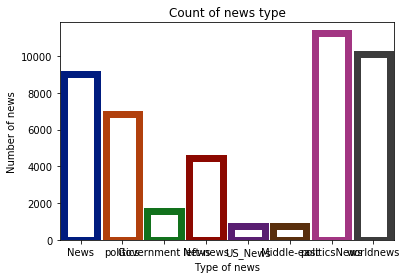

In [17]:
#Plotting the frequency plot
ax = sns.countplot(x="subject", data=clean_news,
                   facecolor=(0, 0, 0, 0),
                   linewidth=7,
                   edgecolor=sns.color_palette("dark", 9))

#Setting labels and font size
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(10)
ax.yaxis.get_label().set_fontsize(10)

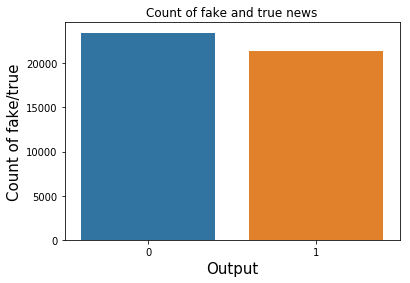

In [18]:
ax=sns.countplot(x="output", data=clean_news)

#Setting labels and font size
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

Insights:

We have a pretty much balanced data

But the count of fake news is higher than the true news but not on a greater extent

Deriving new features from the news
Lets extract more features from the news feature such as

Polarity: The measure which signifies the sentiment of th news

Review length: Length of the news(number of letters and spaces)

Word Count: Number of words in the news

In [19]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

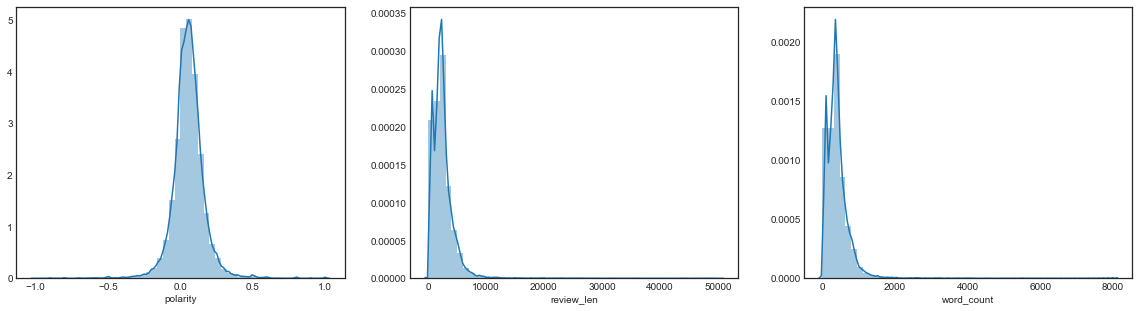

In [20]:
#Extracting the features from the news
clean_news['polarity'] = clean_news['news'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_news['review_len'] = clean_news['news'].astype(str).apply(len)
clean_news['word_count'] = clean_news['news'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(clean_news['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(clean_news['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(clean_news['word_count'])
fig = plt.gcf()

In [21]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [22]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

the 1013570
to 551828
of 448644
and 410084
in 353762
that 239260
on 196149
for 179071
is 169230
trump 140400
he 133510
said 130258
it 128983
with 121215
was 116587
as 104887
his 97825
by 96871
has 89423
be 84260


In [23]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(clean_news['news'], 20)

#Printing word and their respective frequencies
for word, freq in common_words:
    print(word, freq)

#Creating a dataframe with words and count
df6 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Grouping the words and plotting their frequencies
df6.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in news')

president donald trump 6806
president barack obama 3735
new york times 2034
donald trump realdonaldtrump 1790
reuters president donald 1476
black lives matter 1431
president united states 1096
white house said 1050
presidentelect donald trump 1043
new york city 1006
president vladimir putin 955
news century wire 951
national security adviser 898
affordable care act 868
director james comey 860
speaker paul ryan 851
fbi director james 777
state rex tillerson 775
secretary state rex 765
russian president vladimir 745


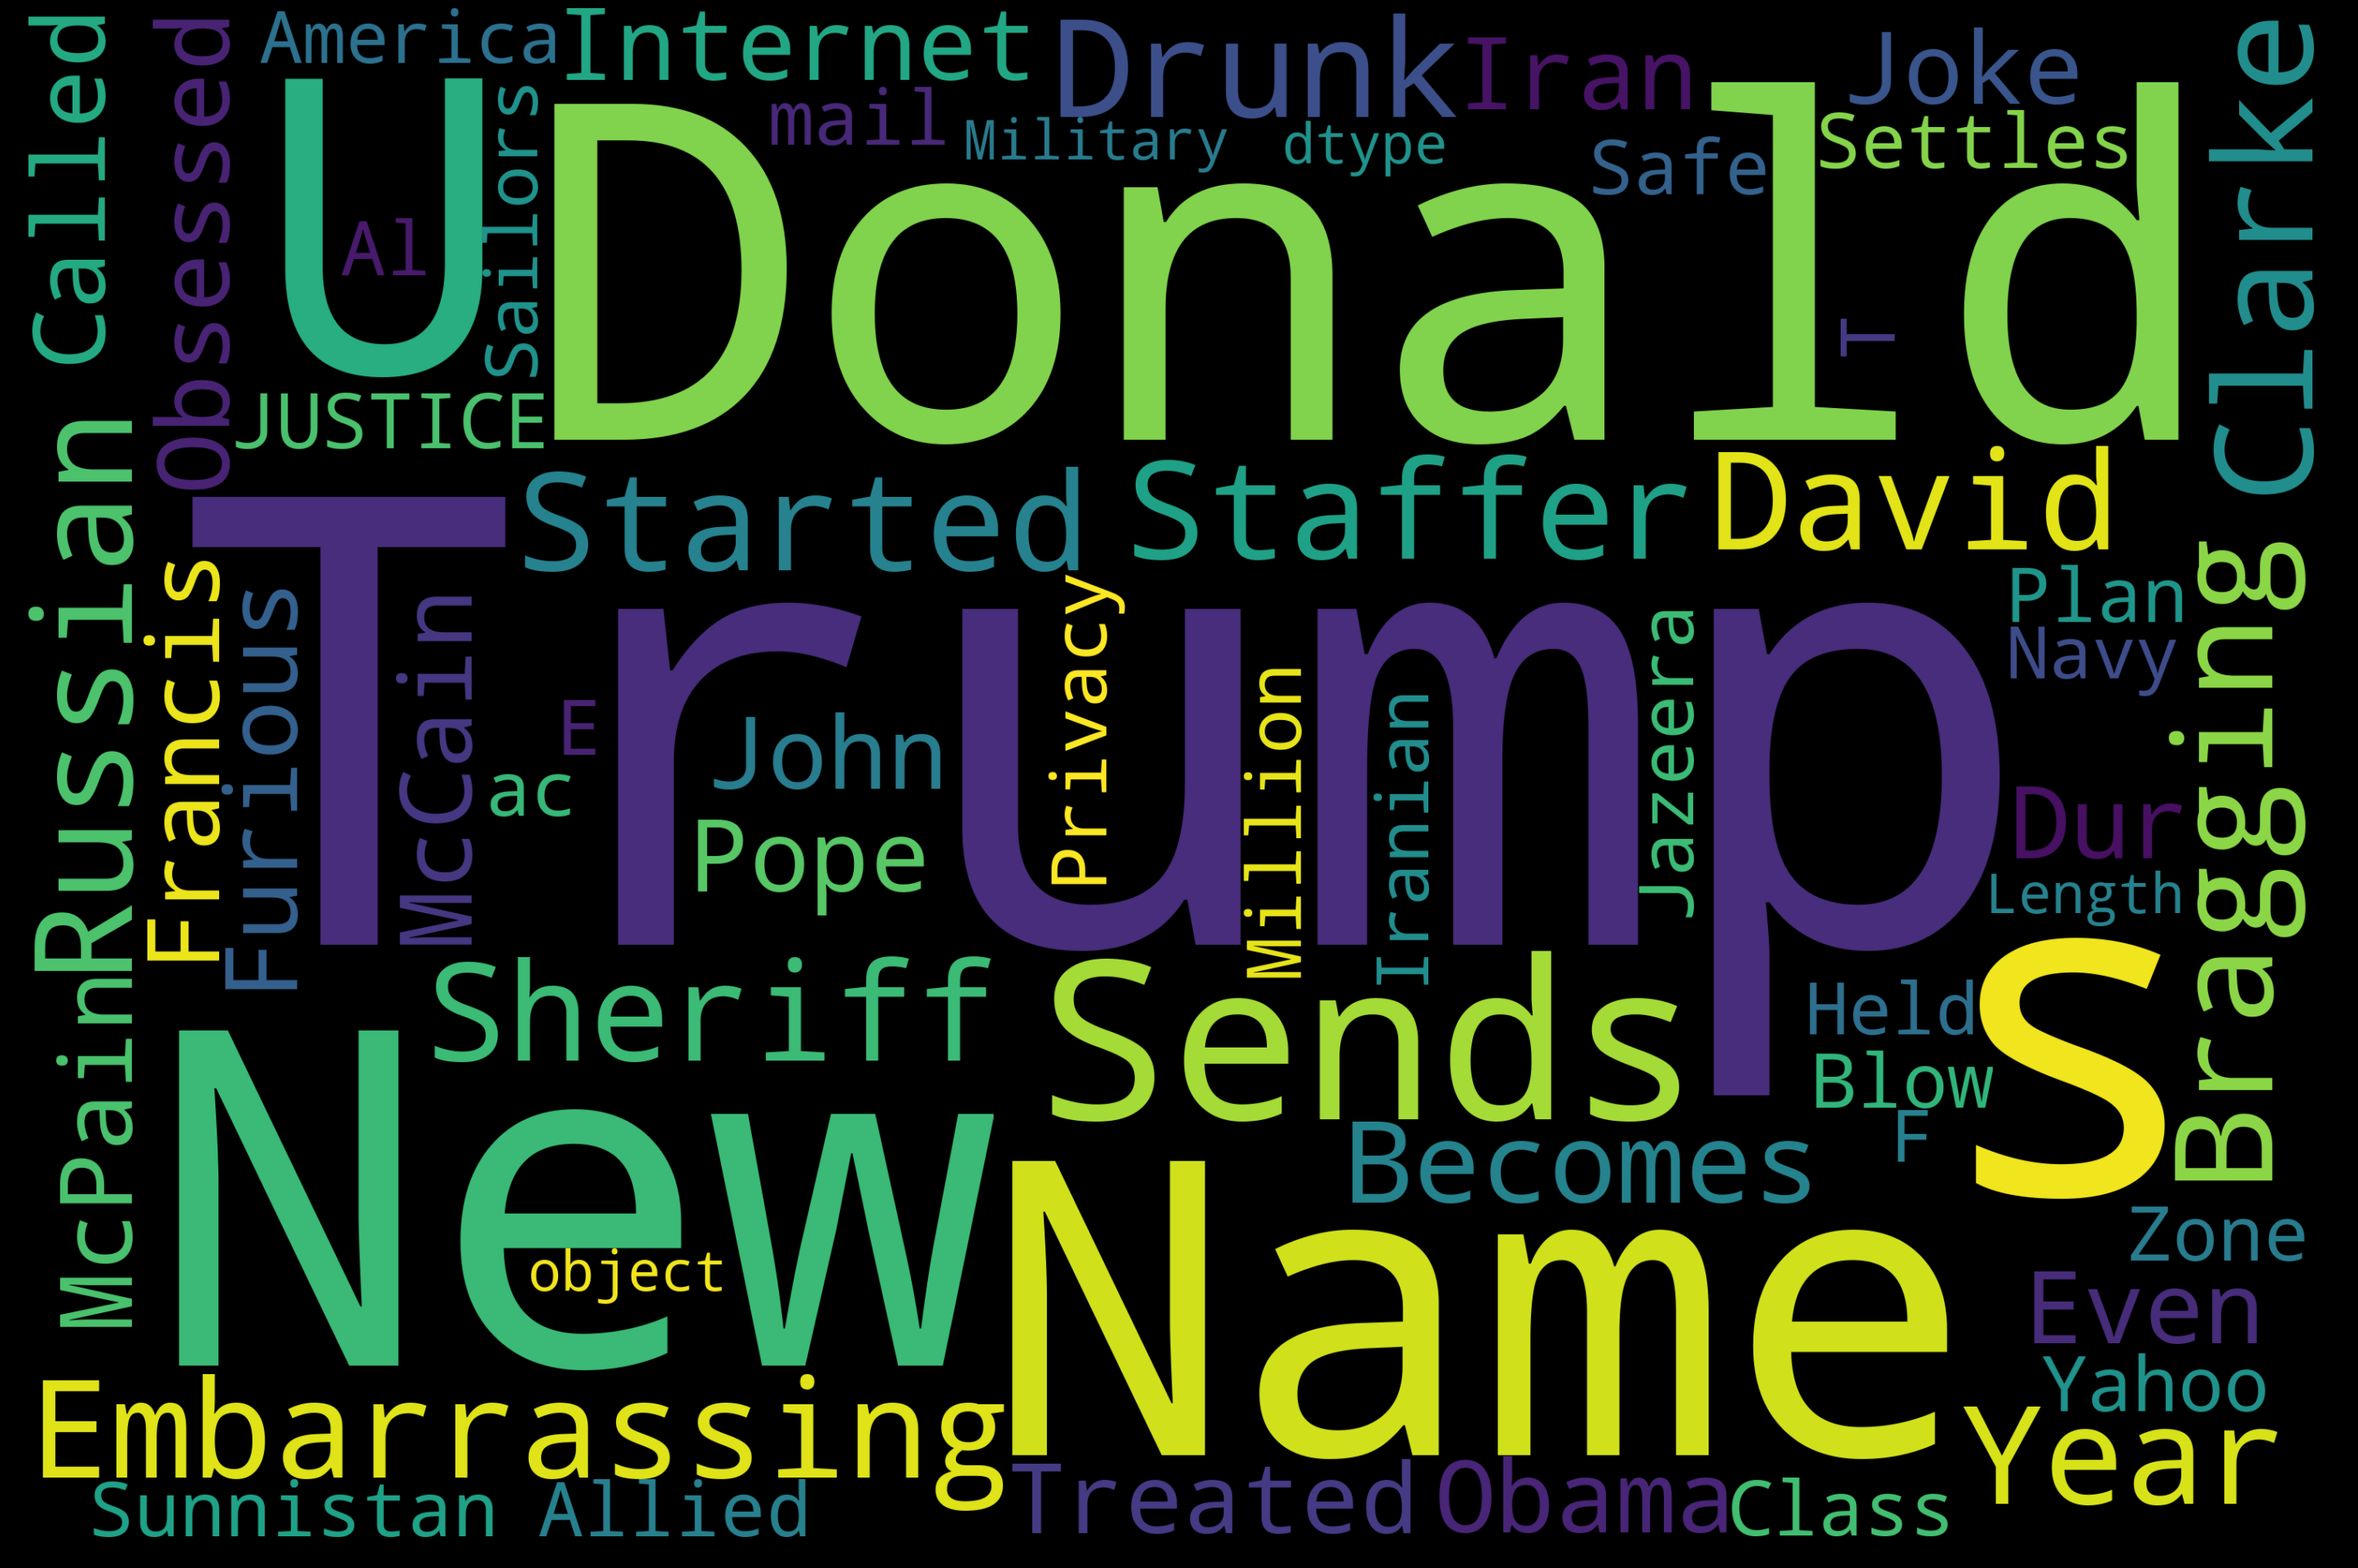

In [24]:
text = fake_news["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
#Extracting ' news' for processing
news_features=clean_news.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.tail()

,news
44883,fully committed nato backs new us approach on ...
44884,lexisnexis withdrew two products from chinese ...
44885,minsk cultural hub becomes haven from authorit...
44886,vatican upbeat on possibility of pope francis ...
44887,indonesia to buy billion worth of russian jet...


In [30]:
news_features['news'][0]

'donald trump sends embarrassing new year’s eve message disturbingdonald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year great year america donald j trump realdonaldtrump december tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december one likes calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk i

In [26]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the news dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)   

In [32]:
corpus[2]

'sheriff david clark becom internet joke threaten poke peopl eye friday reveal former milwauke sheriff david clark consid homeland secur secretari donald trump administr email scandal ownin januari brief runin plane clark fellow passeng dan black later detain polic reason whatsoev except mayb feel hurt clark messag polic stop black deplan search warrant execut fbi see exchangesclark call fake news even though copi search warrant internet unintimid lib media attempt smear discredit fake news report design silenc former sheriff tweet continu poke eye sharp stick bitch slap scum bag til get attack better peopl maga unintimid lib media attempt smear discredit fake news report design silenc continu poke eye sharp stick bitch slap scum bag til get attack better peopl maga david clark jr sheriffclark decemb stop therebreak news lie lib media make fake news smear antidot go right punch nose make tast blood noth get bulli like lie lib media attent better give tast blood neverbackdown david clar

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(44888, 5000)

In [28]:
#Getting the target variable
y=clean_news['output']

In [29]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
param_grid =  {'loss': ['hinge', 'squared_loss'], 'penalty': ['l2','l1'],
       'alpha':[0.01,0.001],'max_iter':[10]}

clf2 = GridSearchCV(SGDClassifier(), param_grid)f
clf2.fit(X_train, y_train)
print("Best parameters are: ", clf2.best_params_)

Best parameters are:  {'alpha': 0.001, 'loss': 'squared_loss', 'max_iter': 10, 'penalty': 'l2'}


In [37]:
from sklearn.metrics import classification_report 
y_pred = clf2.predict(X_test)
print("The classification report is:")
print(classification_report(y_test, y_pred))

print("The accuracy for testing data is", np.mean(y_pred == y_test) )
print("The accuracy for training data is", np.mean(clf2.predict(X_train) == y_train) )

The classification report is:
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      7103
          1       0.97      0.97      0.97      6364

avg / total       0.97      0.97      0.97     13467

The accuracy for testing data is 0.971040320784139
The accuracy for training data is 0.9712930842430222


In [30]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, y_train)

In [35]:
from sklearn.metrics import classification_report 
y_pred = clf.predict(X_test)
print("The classification report is:")
print(classification_report(y_test, y_pred))

print("The accuracy for testing data is", np.mean(y_pred == y_test) )
print("The accuracy for training data is", np.mean(clf.predict(X_train) == y_train) )

The classification report is:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7103
           1       0.94      0.96      0.95      6364

    accuracy                           0.96     13467
   macro avg       0.95      0.96      0.95     13467
weighted avg       0.96      0.96      0.96     13467

The accuracy for testing data is 0.955001113833816
The accuracy for training data is 0.9530568727920817


In [31]:
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import cross_val_score

cv_score_nb = cross_val_score(
    clf,
    X_train,
    y_train,
    cv = 3,
    n_jobs = -1)

print('Train - Naive Bayes cross validated score is: '+ str(np.mean(cv_score_nb)))


Train - Naive Bayes cross validated score is: 0.9506698631163751


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
basemodel = LogisticRegression(solver='liblinear', random_state=0)
basemodel.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [45]:
from sklearn.metrics import classification_report 
y_pred = basemodel.predict(X_test)
print("The classification report is:")
print(classification_report(y_test, y_pred))

print("The accuracy for testing data is", np.mean(y_pred == y_test) )
print("The accuracy for training data is", np.mean(basemodel.predict(X_train) == y_train) )

The classification report is:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7103
           1       0.98      0.98      0.98      6364

    accuracy                           0.98     13467
   macro avg       0.98      0.98      0.98     13467
weighted avg       0.98      0.98      0.98     13467

The accuracy for testing data is 0.9826984480582164
The accuracy for training data is 0.988510868527418


In [32]:
from sklearn.linear_model import SGDClassifier

svm_clf = SGDClassifier(
    loss='perceptron', 
    penalty='l2',
    alpha=1e-3,
    max_iter=5,
    random_state=42).fit(X_train, y_train)

In [33]:
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import cross_val_score

cv_score_svm = cross_val_score(
    svm_clf,
    X_train,
    y_train,
    cv = 5,
    n_jobs = -1)

print('Train - SVM cross validated score is: '+ str(np.mean(cv_score_svm)))

Train - SVM cross validated score is: 0.9783584935184102


In [39]:
from sklearn.metrics import classification_report 
y_pred = max_ent_lr.predict(X_test)
print("The classification report is:")
print(classification_report(y_test, y_pred))

print("The accuracy for testing data is", np.mean(y_pred == y_test) )
print("The accuracy for training data is", np.mean(max_ent_lr.predict(X_train) == y_train) )

The classification report is:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7103
           1       0.99      0.98      0.98      6364

    accuracy                           0.99     13467
   macro avg       0.99      0.99      0.99     13467
weighted avg       0.99      0.99      0.99     13467

The accuracy for testing data is 0.9851488824534046
The accuracy for training data is 0.9920435377613698


In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(loss = 'squared_hinge').fit(X_train, y_train)

In [41]:
cv_score_pac = cross_val_score(
    pac,
    X_train,
    y_train,
    cv = 5,
    n_jobs = -1)

print('Train - PAC cross validated score is: '+ str(np.mean(cv_score_pac)))


Train - PAC cross validated score is: 0.9833233117963971


In [48]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


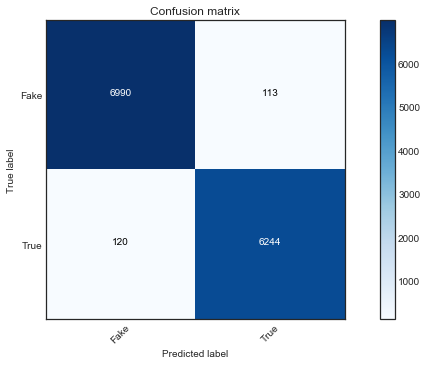

In [50]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','True'])

In [51]:
submission = pd.DataFrame({'Fake News': y_pred})
submission.head()

,Fake News
0,0
1,1
2,0
3,0
4,0


In [53]:
# Load local GloVe weights - Download the file and store it
embeddings_index = dict()
f = open('GloVe-master/src/glove.c', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded {} word vectors.'.format(len(embeddings_index)))

ValueError: could not convert string to float: 'GloVe:'

In [ ]:
# create a weight matrix for words in training docs
print('Get vocab_size')
vocab_size = len(tokenizer.word_index) + 1

print('Create the embedding matrix')
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# The best model file name for uniformity
best_model_file_name = "models/best_model_simple_with_GloVe.hdf5"

# the model
def get_simple_GloVe_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 
                        300, 
                        weights=[embedding_matrix], 
                        input_length=max_length,
                        trainable=False))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

callbacks=[
    keras.callbacks.EarlyStopping(monitor="val_loss", 
                                  patience=15, 
                                  verbose=1, 
                                  mode="min", 
                                  restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(filepath=best_model_file_name, 
                                    verbose=1, 
                                    save_best_only=True)
]

model = get_simple_GloVe_model()
print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    validation_data=(X_test, y_test), 
                    callbacks=callbacks)

model = keras.models.load_model(best_model_file_name)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

In [45]:
submission['Fake News'].value_counts()

0    7117
1    6350
Name: Fake News, dtype: int64